<a href="https://colab.research.google.com/github/NikhilParihar-4/SMS-Spam-Classifier/blob/main/SMS_Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1171,spam,Got what it takes 2 take part in the WRC Rally...,NaN,NaN,NaN
4024,ham,&lt;#&gt; in mca. But not conform.,NaN,NaN,NaN
4096,ham,i am going to bed now prin,NaN,NaN,NaN
326,ham,Hi da:)how is the todays class?,NaN,NaN,NaN
4821,spam,u r a winner U ave been specially selected 2 r...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop Last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
3988,ham,Ok lor. Anyway i thk we cant get tickets now c...
3968,ham,Thanks for your message. I really appreciate y...
1946,ham,Hey we can go jazz power yoga hip hop kb and y...
1562,ham,Dude just saw a parked car with its sunroof po...
1026,ham,Yes da. Any plm at ur office


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1517,spam,Our brand new mobile music service is now live...
4493,ham,Man this bus is so so so slow. I think you're ...
3976,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
4662,ham,No. Yes please. Been swimming?
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EDA / Data Exploration

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6ca3a24bb0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

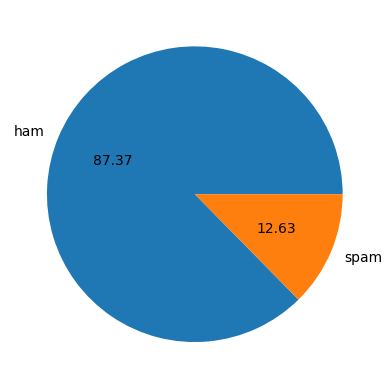

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [21]:
# Big chunk of ham and very less spam so out data is not balanced

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['num_characters'] = df['text'].apply(len) #number of char

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #words count

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  #sentence

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#targeting ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#targeting spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

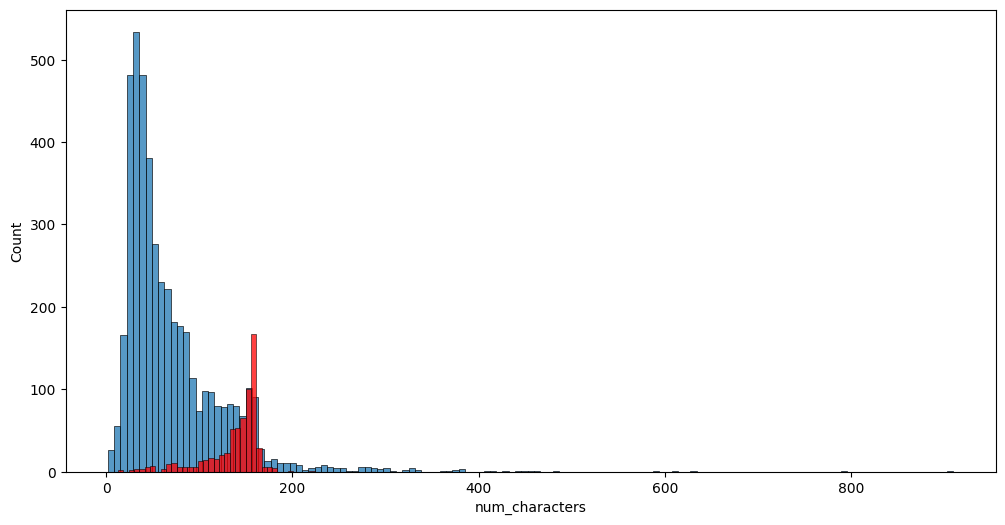

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

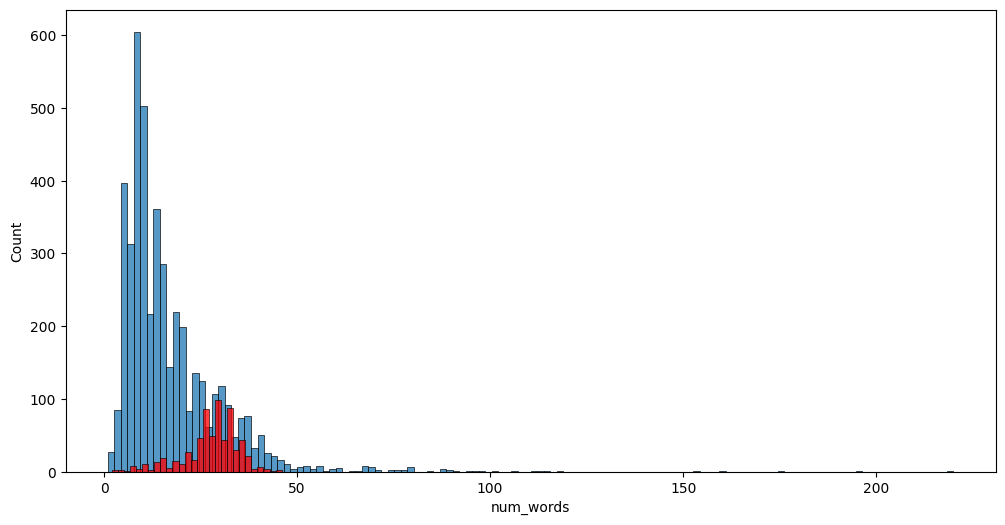

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

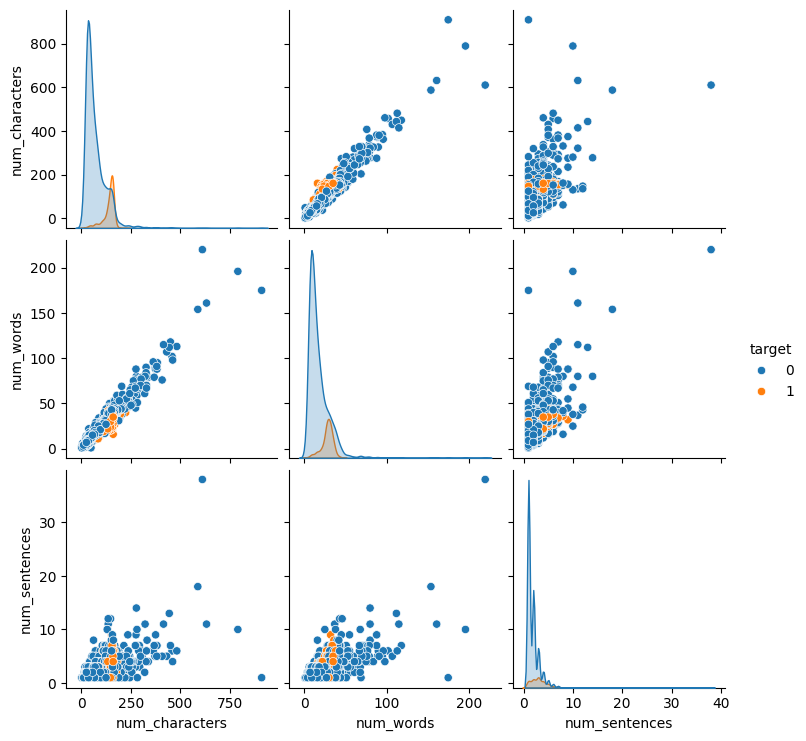

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

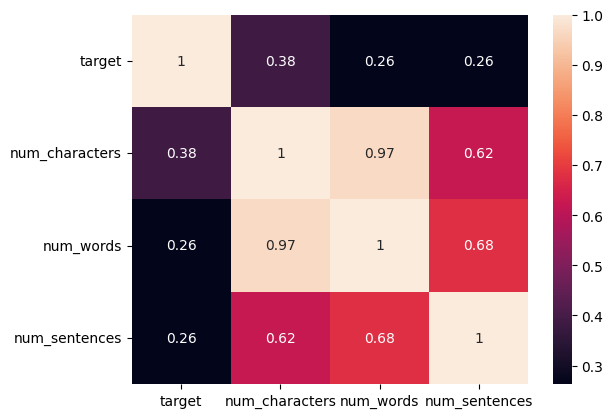

In [38]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot=True)

# 3.Data Preprocessing

-Lower case

-Tokenization

-Removing special characters

-Removing stop words and punctuation

-Stemming


In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text =  text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dreaming')

'dream'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

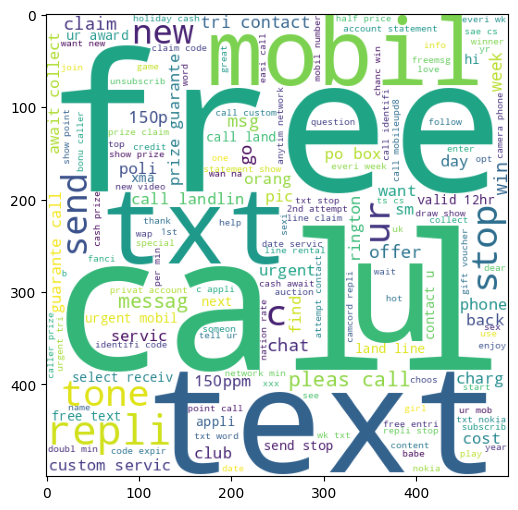

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

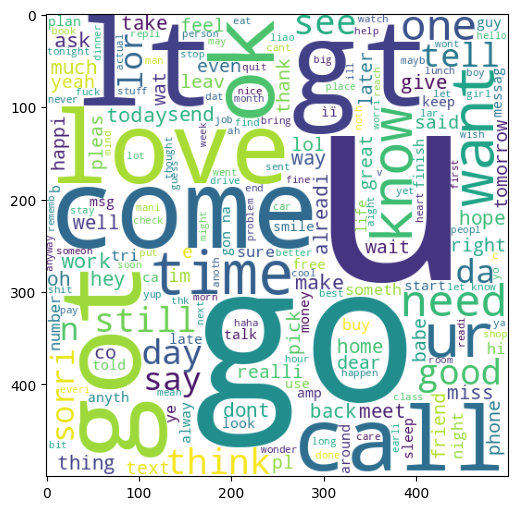

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

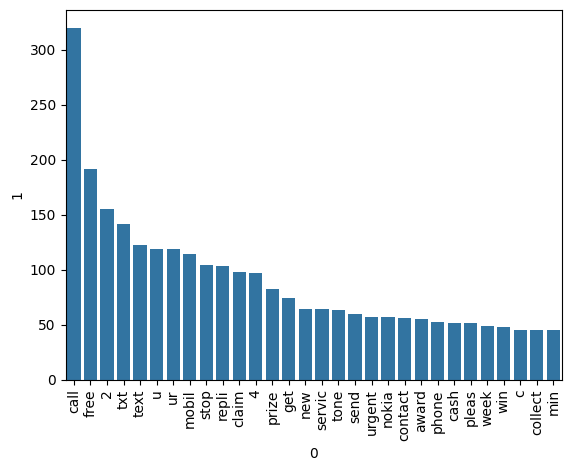

In [52]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=0, y=1, data=data)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35404

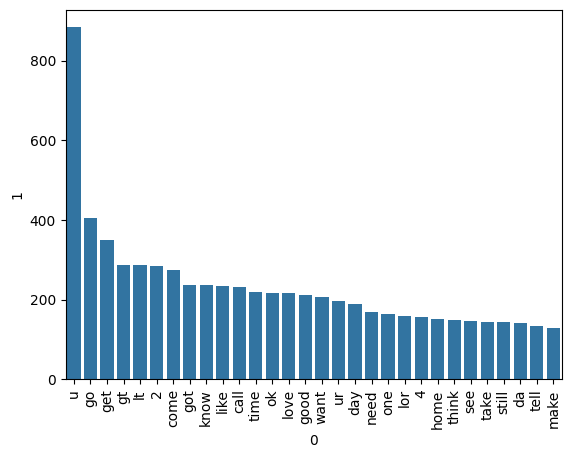

In [55]:
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=0, y=1, data=data)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# Text Vectorization
# using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Building the model

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=17)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [60]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [61]:
X.shape

(5169, 17)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.36847195357833656
[[253 643]
 [ 10 128]]
0.16601815823605706


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8926499032882012
[[892   4]
 [107  31]]
0.8857142857142857


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.36847195357833656
[[253 643]
 [ 10 128]]
0.16601815823605706


In [70]:
#tfidf --> MNB

In [71]:
!pip install xgboost

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [76]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8984526112185687, 0.6542056074766355)

In [77]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(svc,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  KN
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  NB
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  DT
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  LR
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  RF
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  AdaBoost
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  BgC
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  ETC
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  GBDT
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355
For  xgb
Accuracy -  0.8984526112185687
Precision -  0.6542056074766355


In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [79]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.898453,0.654206
1,KN,0.898453,0.654206
2,NB,0.898453,0.654206
3,DT,0.898453,0.654206
4,LR,0.898453,0.654206
5,RF,0.898453,0.654206
6,AdaBoost,0.898453,0.654206
7,BgC,0.898453,0.654206
8,ETC,0.898453,0.654206
9,GBDT,0.898453,0.654206


In [80]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [81]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.898453
1,KN,Accuracy,0.898453
2,NB,Accuracy,0.898453
3,DT,Accuracy,0.898453
4,LR,Accuracy,0.898453
5,RF,Accuracy,0.898453
6,AdaBoost,Accuracy,0.898453
7,BgC,Accuracy,0.898453
8,ETC,Accuracy,0.898453
9,GBDT,Accuracy,0.898453


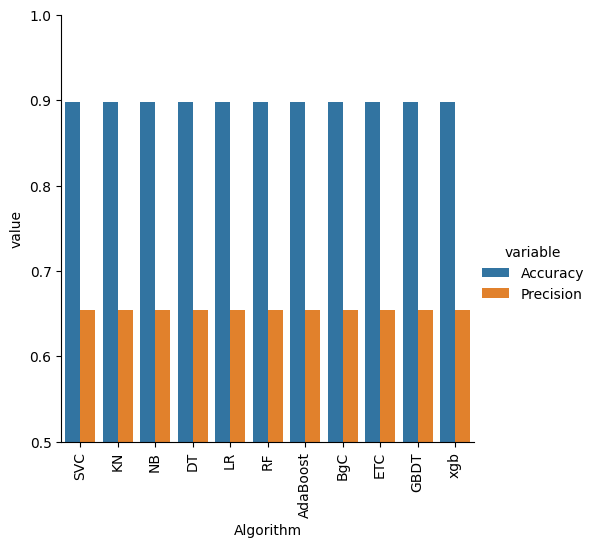

In [82]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
# model improve
#1.change the max_features paramter of Tfidf

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
1,KN,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
2,NB,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
3,DT,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
4,LR,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
5,RF,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
6,AdaBoost,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
7,BgC,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
8,ETC,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206
9,GBDT,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206,0.898453,0.654206


In [89]:
# voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9052224371373307
Precision 0.717391304347826


In [93]:
#Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9168278529980658
Precision 0.7452830188679245


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [98]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example data
texts = ["I love this product!", "This is the worst experience ever.", "Absolutely fantastic!", "Terrible, I hated it.", "Great service and quality."]
labels = [1, 0, 1, 0, 1]  # 1 for positive, 0 for negative

# Convert text data to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize and fit the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict using the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Save the model if needed
import joblib
joblib.dump(model, 'model.pkl')

# To load the model later
model = joblib.load('model.pkl')

# Example of predicting new data
new_texts = ["I had a great time using this!", "Horrible experience, never coming back."]
new_X = vectorizer.transform(new_texts)
result = model.predict(new_X)
print(result)


Accuracy: 0.0
[1 1]


In [99]:
# import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
import joblib

# load the saved vectorizer and model
vectorizer = pickle.load(open('vectorizer.pkl', 'rb')) # Load the CountVectorizer used during training
mnb = joblib.load(open('model.pkl', 'rb'))

# define a function to predict spam/ham
def predict_spam(text):
  # transform the input text using the loaded vectorizer
  transformed_text = vectorizer.transform([text])# Use the loaded CountVectorizer

  # predict the class of the input text using the loaded model
  prediction = mnb.predict(transformed_text)

  # return the prediction
  if prediction[0] == 1:
    return 'spam'
  else:
    return 'ham'

In [102]:
# Assuming you have trained your model and saved it as 'model.pkl' and your vectorizer as 'vectorizer.pkl'
import pickle
import joblib

# Load the trained model and vectorizer
model = joblib.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

def classify_sms(sms_text):
    # Preprocess the SMS text (same preprocessing steps you used before)
    transformed_text = transform_text(sms_text)

    # Vectorize the preprocessed text
    vectorized_text = vectorizer.transform([transformed_text])

    # Make the prediction
    prediction = model.predict(vectorized_text)[0]

    if prediction == 1:
        return "Spam"
    else:
        return "Ham"

In [116]:
sms_text = input("enter a message:     ")
result = classify_sms(sms_text)
print("\n")
print(f"The SMS is classified as:   {result}")

enter a message:     Congratulations! You've won a free cruise! Call now to claim your prize...


The SMS is classified as:   Spam
